In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('HEALTH_HCQI_2016.csv')

In [3]:
df

,Country,Periods,IND,Indicator,Age Group,VAL,Value,Value.1
0,Canada,2016,SUICMENT,In-patient suicide among patients diagnosed wi...,15 years old and over,AS_STD_RATE_CPAT,Age-sex standardised rate per 100 patients,0.05
1,Canada,2016,FORBPROC,Foreign body left in during procedure,15 years old and over,CRUDE_DIS_ALL,Crude rate per 100 000 hospital discharges (Al...,10.30
2,Canada,2016,POSTWODE,Post-operative wound dehiscence,15 years old and over,CRUDE_DIS_SURG,Crude rate per 100 000 hospital discharges (Su...,128.70
3,Canada,2016,POSTWODE,Post-operative wound dehiscence,15 years old and over,CRUDE_DIS_ALL,Crude rate per 100 000 hospital discharges (Al...,185.60
4,Canada,2016,POSTPESP,Post-operative pulmonary embolism after hip or...,15 years old and over,CRUDE_DIS_ALL,Crude rate per 100 000 hospital discharges (Al...,568.30
5,Canada,2016,POSTDVSP,Post-operative deep vein thrombosis after hip ...,15 years old and over,CRUDE_DIS_ALL,Crude rate per 100 000 hospital discharges (Al...,283.10
6,Canada,2016,POSTSESP,Post-operative sepsis after abdominal surgery,15 years old and over,CRUDE_DIS_SURG,Crude rate per 100 000 hospital discharges (Su...,1014.80
7,Canada,2016,POSTSESP,Post-operative sepsis after abdominal surgery,15 years old and over,CRUDE_DIS_ALL,Crude rate per 100 000 hospital discharges (Al...,1232.50
8,United States,2016,POSTWODE,Post-operative wound dehiscence,15 years old and over,CRUDE_DIS_SURG,Crude rate per 100 000 hospital discharges (Su...,68.30
9,United States,2016,POSTPESP,Post-operative pulmonary embolism after hip or...,15 years old and over,CRUDE_DIS_SURG,Crude rate per 100 000 hospital discharges (Su...,446.20


In [4]:
# canada = df.loc[df["Country"]=="Canada", ['Indicator','Value.1','Value']]
# US = df.loc[df["Country"]=="United States",['Indicator','Value.1','Value']]
canada = df.loc[df["Country"]=="Canada"]
US = df.loc[df["Country"]=="United States"]

In [5]:
cananda_df = canada[['Indicator','Value','Value.1']].reset_index(drop=True)
US_df = US[['Indicator','Value','Value.1']].reset_index(drop=True)


In [6]:
cleaned_df = pd.merge(cananda_df, US_df, on = ['Indicator','Value'])
cleaned_df.rename(columns={'Value':'Description',
                           'Value.1_x':'Canada',
                           'Value.1_y':'US'},inplace=True)
cleaned_df.to_csv("Cleaned_df_Healthcare Quality Indicator.csv")
cleaned_df

,Indicator,Description,Canada,US
0,Post-operative wound dehiscence,Crude rate per 100 000 hospital discharges (Su...,128.7,68.3
1,Post-operative sepsis after abdominal surgery,Crude rate per 100 000 hospital discharges (Su...,1014.8,1048.6
2,Asthma hospital admission,Age-sex standardised rate per 100 000 population,14.2,39.2
3,Chronic obstructive pulmonary disease hospital...,Age-sex standardised rate per 100 000 population,235.4,228.9
4,Congestive heart failure hospital admission,Age-sex standardised rate per 100 000 population,164.3,371.4
5,Diabetes hospital admission,Age-sex standardised rate per 100 000 population,92.9,169.7
6,Hypertension hospital admission,Age-sex standardised rate per 100 000 population,14.1,46.0


In [7]:
cleaned_df.reset_index(drop=True, inplace=True)

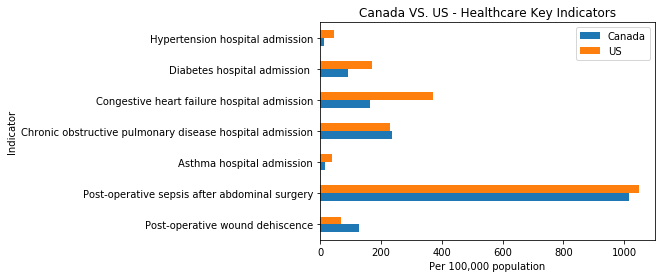

In [51]:
bar_graph = cleaned_df.plot.barh(x='Indicator',rot=0,title="Canada VS. US - Healthcare Key Indicators")
plt.xlabel('Per 100,000 population')
plt.savefig('Bar_Graphs/Overall_bar.jpeg')
plt.show()

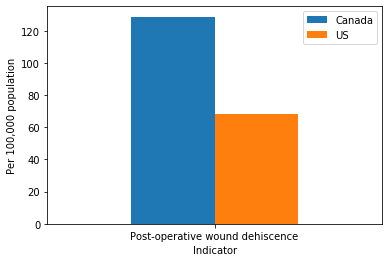

In [52]:
post_operative_wound_dehiscence_bar=cleaned_df.loc[cleaned_df['Indicator']=='Post-operative wound dehiscence',:]\
.plot.bar(x ='Indicator' ,rot=0)
plt.ylabel('Per 100,000 population')
plt.savefig('Bar_Graphs/post_operative_wound_dehiscence_bar.jpeg')
plt.show()

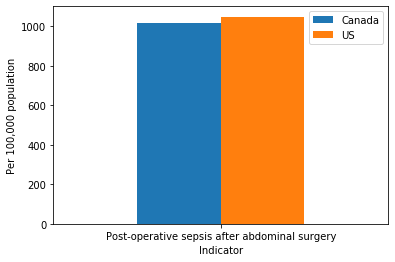

In [53]:
post_operative_sepsis_bar=cleaned_df.loc[cleaned_df['Indicator']=='Post-operative sepsis after abdominal surgery',:]\
.plot.bar(x ='Indicator' ,rot=0)
plt.ylabel('Per 100,000 population')
plt.savefig('Bar_Graphs/post_operative_sepsis_bar.jpeg')
plt.show()

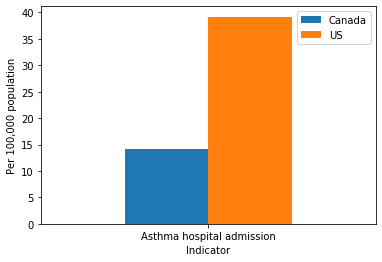

In [54]:
asthma_hospital_admission_bar=cleaned_df.loc[cleaned_df['Indicator']=='Asthma hospital admission',:]\
.plot.bar(x ='Indicator' ,rot=0)
plt.ylabel('Per 100,000 population')
plt.savefig('Bar_Graphs/asthma_hospital_admission_bar.jpeg')
plt.show()

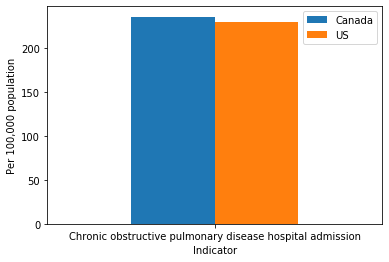

In [55]:
Chronic_obstructive_bar=cleaned_df.loc[cleaned_df['Indicator']=='Chronic obstructive pulmonary disease hospital admission',:]\
.plot.bar(x ='Indicator' ,rot=0)
plt.ylabel('Per 100,000 population')
plt.savefig('Bar_Graphs/Chronic_obstructive_bar.jpeg')
plt.show()

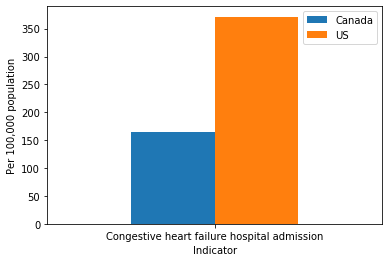

In [56]:
congestive_heart_failure_bar=cleaned_df.loc[cleaned_df['Indicator']=='Congestive heart failure hospital admission',:]\
.plot.bar(x ='Indicator' ,rot=0)
plt.ylabel('Per 100,000 population')
plt.savefig('Bar_Graphs/congestive_heart_failure_bar.jpeg')
plt.show()

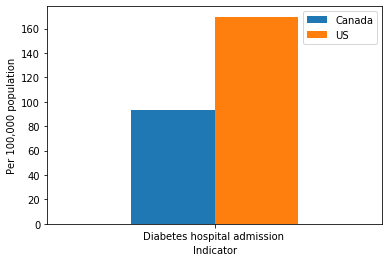

In [57]:
diabetes_admission_bar=cleaned_df.loc[cleaned_df['Indicator']=='Diabetes hospital admission ',:]\
.plot.bar(x ='Indicator',rot=0)
plt.ylabel('Per 100,000 population')
plt.savefig('Bar_Graphs/diabetes_admission_bar.jpeg')
plt.show()

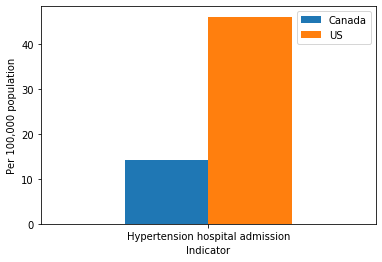

In [58]:
hypertension_admission_bar=cleaned_df.loc[cleaned_df['Indicator']=='Hypertension hospital admission',:]\
.plot.bar(x ='Indicator',rot=0)
plt.ylabel('Per 100,000 population')
plt.savefig('Bar_Graphs/hypertension_admission_bar.jpeg')
plt.show()


